Dependencias

In [412]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import sympy as sp


In [413]:
M= 2.4
m=0.23
l=0.3
g=9.81
ss=sp.symbols("s")

In [414]:
def controlador_pid(kp,kd,ki):
    s = ctrl.TransferFunction([1, 0], [1])
    return kp+kd*s+ki/s



In [415]:
kp=80
kd=200
ki=300

controlador=controlador_pid(kp,kd,ki)


In [416]:
numP = [1/(M*l)]
denP = [1, 0 ,-(m+M)*g/(M*l)]

sistema_2do = ctrl.TransferFunction(numP, denP)

sistema_2do

TransferFunction(array([1.38888889]), array([  1.     ,   0.     , -35.83375]))

In [417]:
Gs=controlador*sistema_2do

lazo_cerrado=ctrl.feedback(Gs,1)

lazo_cerrado

TransferFunction(array([277.77777778, 111.11111111, 416.66666667]), array([  1.        , 277.77777778,  75.27736111, 416.66666667]))

In [418]:
ctrl.poles(lazo_cerrado)


array([-2.77511930e+02+0.j        , -1.32923879e-01+1.21810024j,
       -1.32923879e-01-1.21810024j])

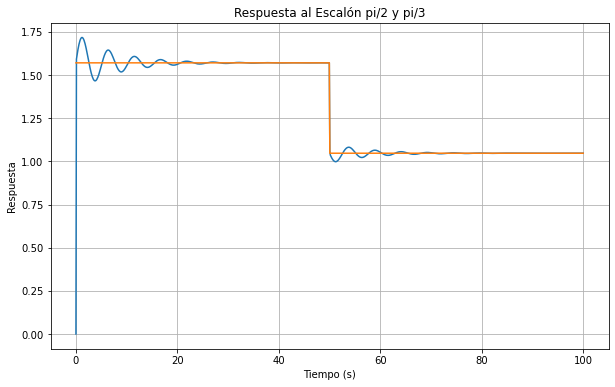

In [423]:
def entrada_personalizada(t):
    mitad = int(len(t) / 2)
    return np.concatenate([np.pi/2*np.ones(mitad),np.pi/3*np.ones(mitad)])

# Generar la señal de entrada personalizada
t = np.linspace(0, 100, 1000)  # Tiempo de simulación
u = entrada_personalizada(t)

# Obtener la respuesta del sistema a la entrada personalizada
t, y = ctrl.forced_response(lazo_cerrado, T=t, U=u)
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.plot(t,u)
plt.title('Respuesta al Escalón pi/2 y pi/3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid()
plt.show()

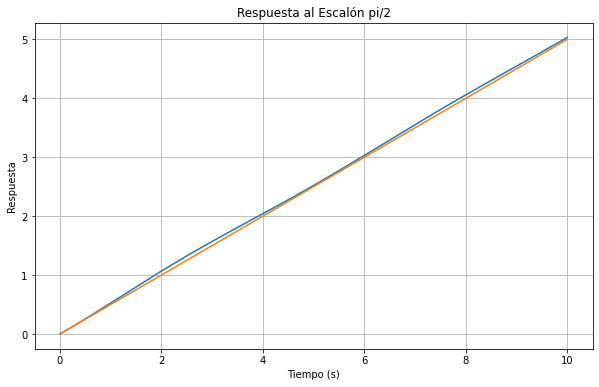

In [424]:
def entrada_personalizada(t):
    
    return (1/2)*t

# Generar la señal de entrada personalizada
t = np.linspace(0, 10, 1000)  # Tiempo de simulación
u = entrada_personalizada(t)

# Obtener la respuesta del sistema a la entrada personalizada
t, y = ctrl.forced_response(lazo_cerrado, T=t, U=u)
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.plot(t,u)
plt.title('Respuesta al Escalón pi/2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid()
plt.show()